# Importing Libraries and Loading Dataset

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Read the data file and convert it to a dataframe
university_df = pd.read_csv("university_admission.csv")

In [4]:
university_df.head()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admission
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
university_df.tail()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admission
995,332,108,5,4.5,4.0,9.02,1,0.87
996,337,117,5,5.0,5.0,9.87,1,0.96
997,330,120,5,4.5,5.0,9.56,1,0.93
998,312,103,4,4.0,5.0,8.43,0,0.73
999,327,113,4,4.5,4.5,9.04,0,0.84


In [6]:
# Display the feature columns
university_df.columns

Index(['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance_of_Admission'],
      dtype='object')

In [7]:
university_df.dtypes

GRE_Score                int64
TOEFL_Score              int64
University_Rating        int64
SOP                    float64
LOR                    float64
CGPA                   float64
Research                 int64
Chance_of_Admission    float64
dtype: object

In [8]:
# Check the shape of the dataframe
university_df.shape
# Basically we have 1000 samples

(1000, 8)

In [9]:
# Check if any missing values
university_df.isnull().sum()
# No missing values

GRE_Score              0
TOEFL_Score            0
University_Rating      0
SOP                    0
LOR                    0
CGPA                   0
Research               0
Chance_of_Admission    0
dtype: int64

In [10]:
# Check the statistics
university_df.describe()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admission
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000
mean,316.472000,107.193000,3.114000,3.374000,3.484000,8.57644,0.560000,0.72174
std,11.289494,6.079368,1.142939,0.990507,0.924986,0.60451,0.496635,0.14107
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.80000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.12750,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.56000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.04000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.92000,1.000000,0.97000


# Exploratory Data Analysis

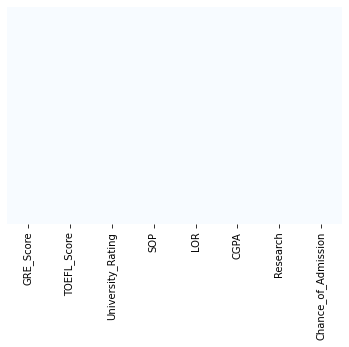

In [11]:
# Check if there are any Null values
sns.heatmap(university_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")
plt.show()
# Basically there is no missing values hence the plot looks blank

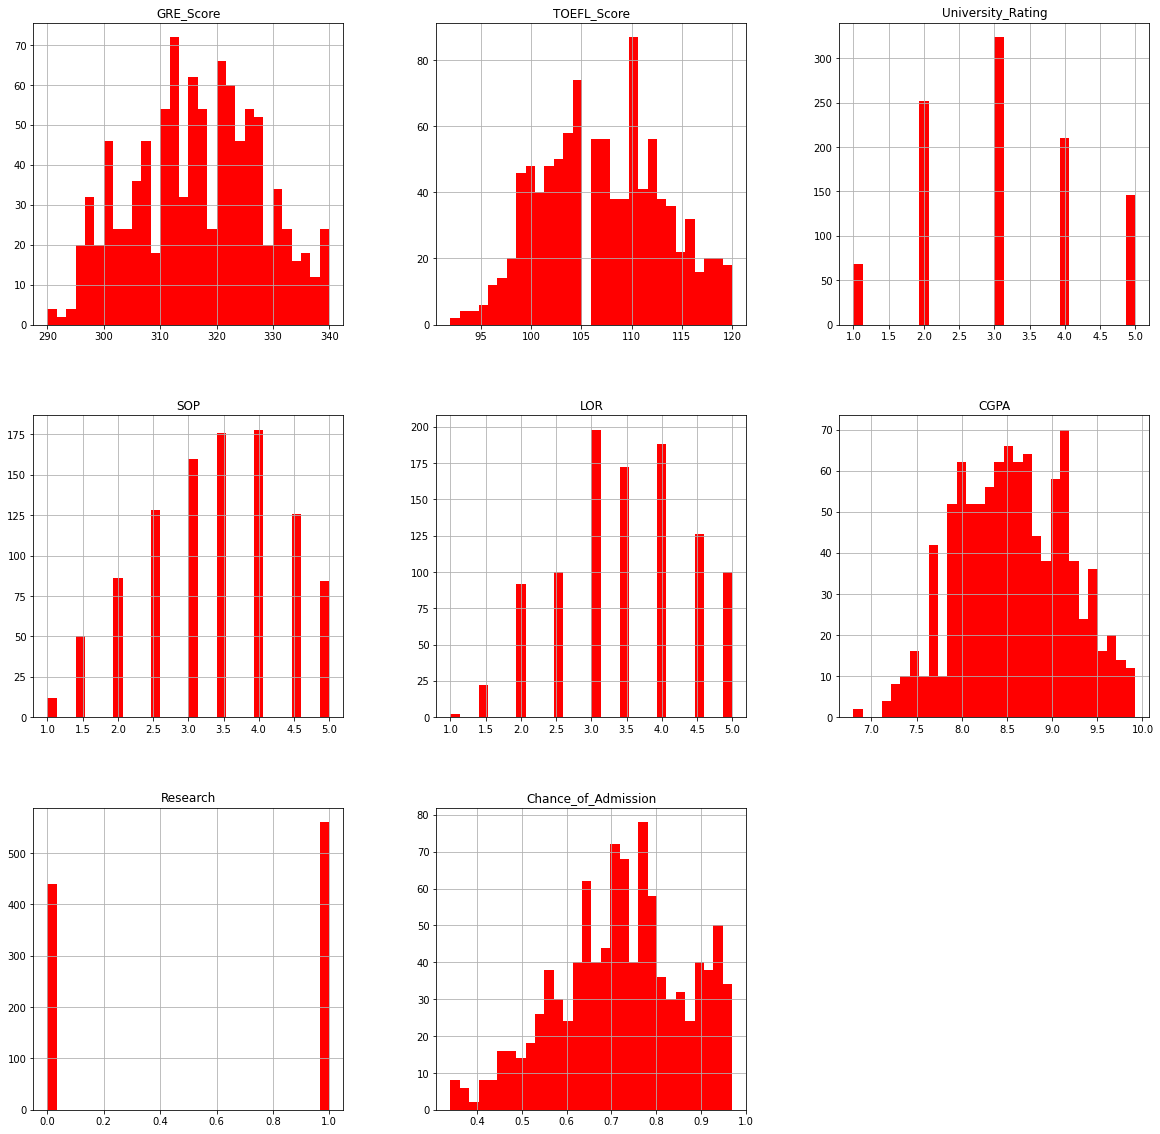

In [12]:
# Let's draw the histogram
university_df.hist(bins = 30, figsize = (20,20), color = 'r');
plt.show()

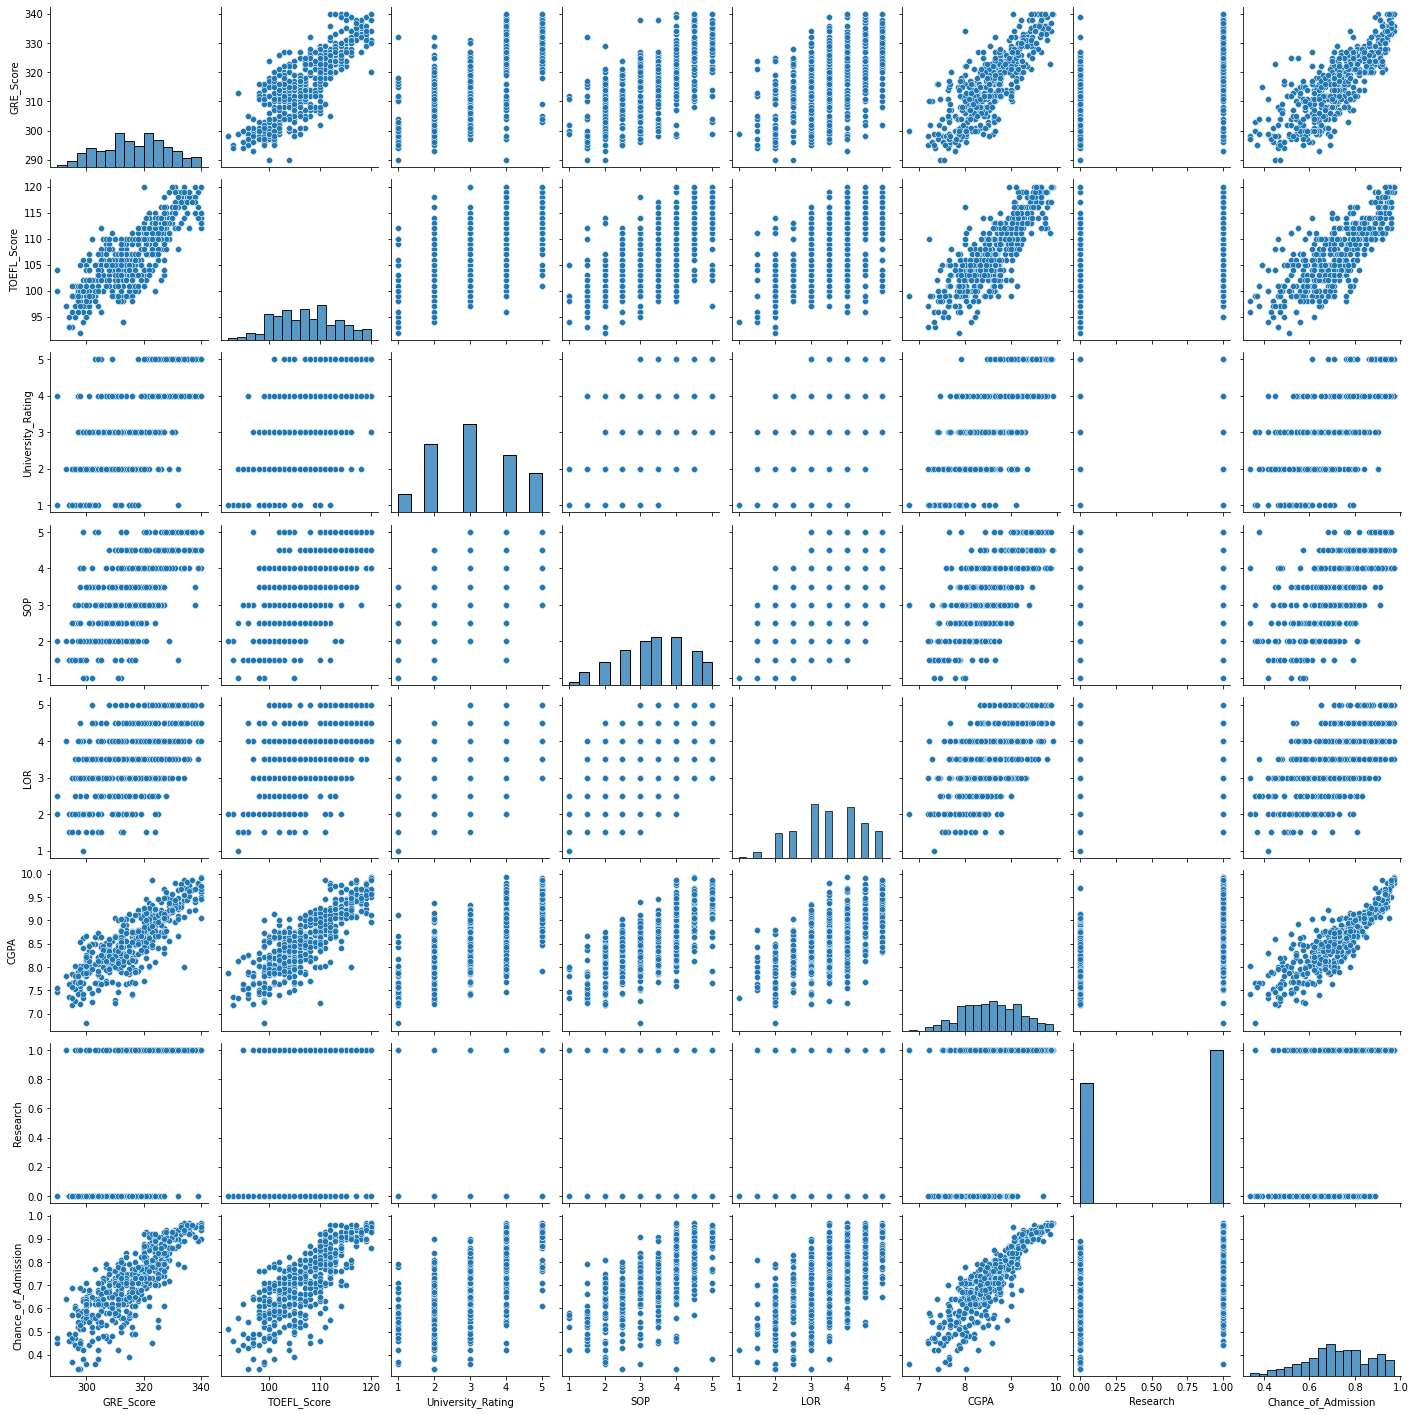

In [13]:
# Let's draw a pair plot to check correlation
sns.pairplot(university_df)
plt.show()
# Here toefl score, GRE score, CGPA are more related to admission

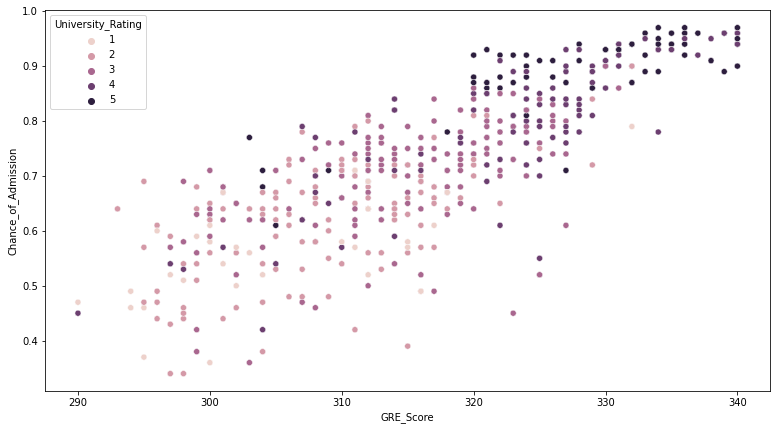

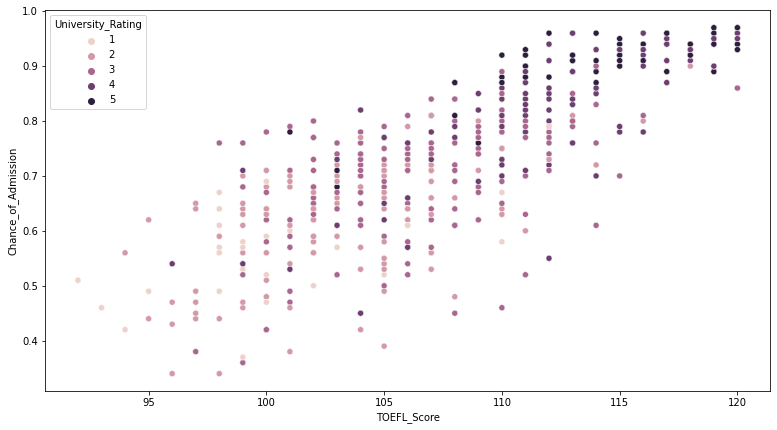

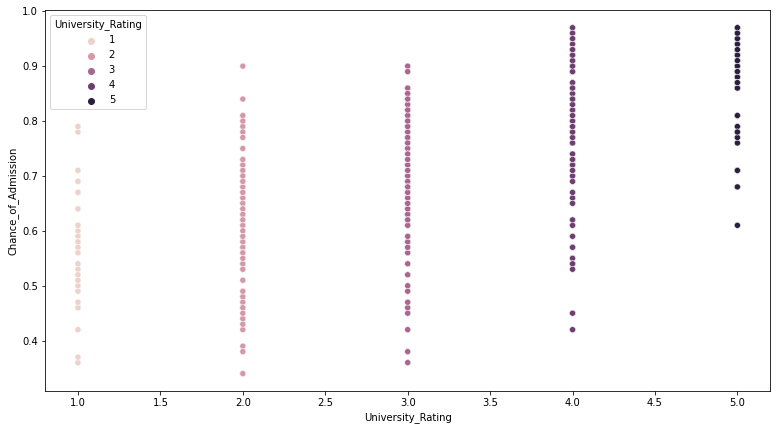

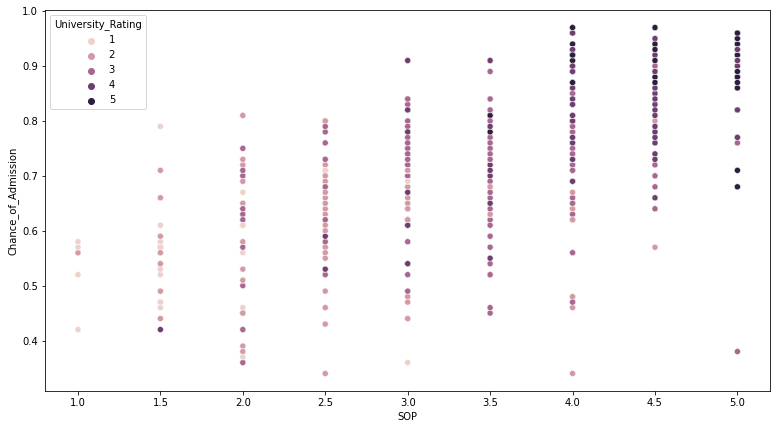

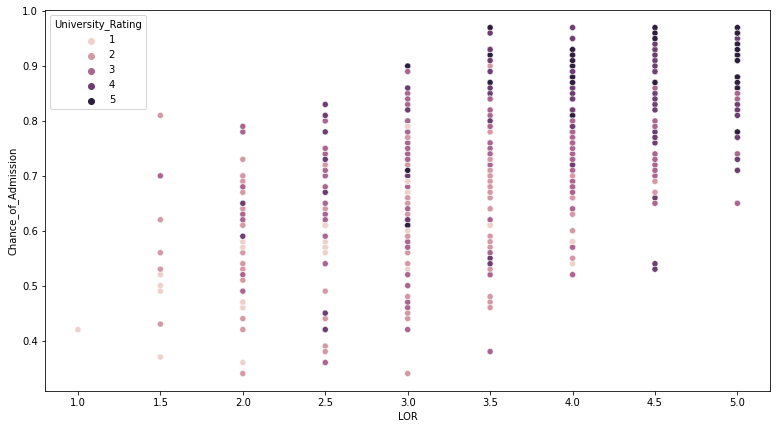

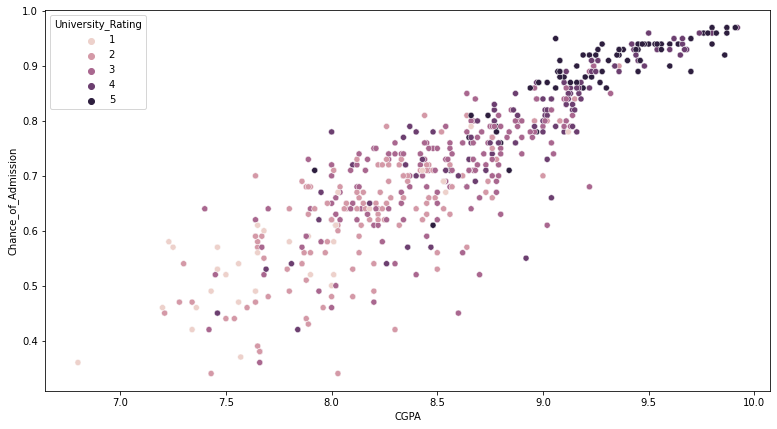

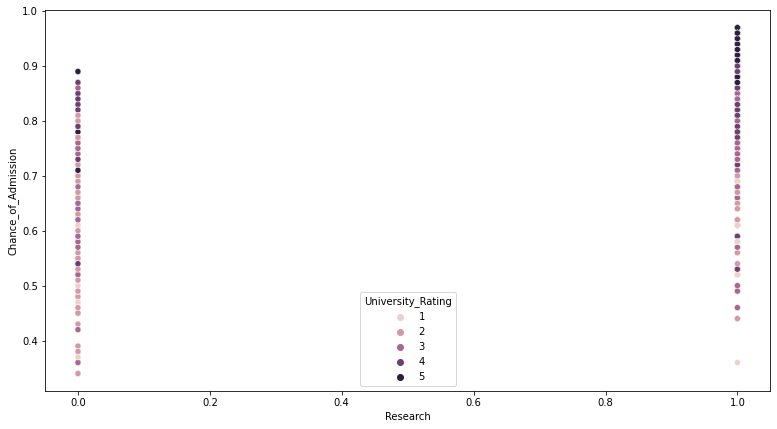

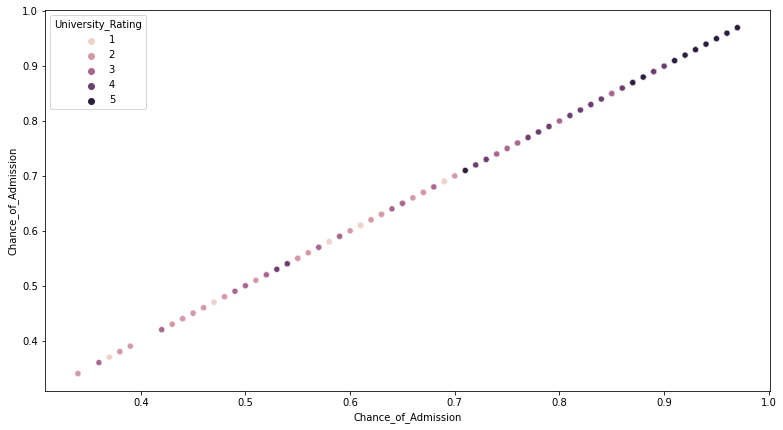

In [14]:
# Let's do a scatter plot for chance of admission with university rating hue
for i in university_df.columns:
    plt.figure(figsize = (13, 7))
    sns.scatterplot(x = i, y = 'Chance_of_Admission', hue = "University_Rating", hue_norm = (1,5), data = university_df)
    plt.show()

<AxesSubplot:>

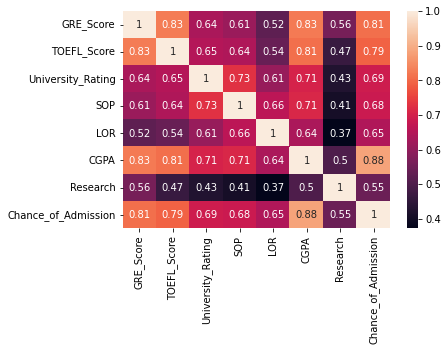

In [16]:
# Let's plot the correlation matrix
corr_matrix = university_df.corr()
plt.figsize = (20,20)
sns.heatmap(corr_matrix, annot = True)

# Prepare the data for training

In [17]:
# Drop the target column
X = university_df.drop(columns = ['Chance_of_Admission'])

In [18]:
y = university_df['Chance_of_Admission']

In [19]:
X.shape

(1000, 7)

In [20]:
y.shape

(1000,)

In [21]:
# Convert both numpy array
X = np.array(X)
y = np.array(y)

In [22]:
# Reshaping the array from (1000,) to (1000, 1)
y = y.reshape(-1,1)
y.shape

(1000, 1)

In [23]:
# Scaling the data before training the model
# Here no scaling required as we will be using XGBoost

In [24]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [26]:
X_train.shape

(800, 7)

In [27]:
X_test.shape

(200, 7)

# Modelling and Evaluation using XGBoost

In [29]:
# Train an XGBoost regressor model 
import xgboost as xgb

model = xgb.XGBRegressor(objective ='reg:squarederror', learning_rate = 0.1, max_depth = 3, n_estimators = 100)
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=16,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [30]:
# Predict using the testing dataset
result = model.score(X_test, y_test)
print("Accuracy : {}".format(result))

Accuracy : 0.8607238613856332


In [31]:
# Make predictions on the test data
y_predict = model.predict(X_test)

In [32]:
y_predict

array([0.68669784, 0.9564221 , 0.6028487 , 0.410748  , 0.410748  ,
       0.58946043, 0.5653464 , 0.6473893 , 0.84268695, 0.9523312 ,
       0.69176036, 0.7019236 , 0.71794057, 0.7630964 , 0.63331574,
       0.7240351 , 0.6498694 , 0.56497455, 0.65185714, 0.6821287 ,
       0.5960462 , 0.6824711 , 0.7146657 , 0.5968908 , 0.49255753,
       0.6365107 , 0.66269547, 0.631207  , 0.81958246, 0.6998947 ,
       0.724631  , 0.743376  , 0.6355726 , 0.71564555, 0.86428046,
       0.5025028 , 0.68345416, 0.614698  , 0.71830535, 0.6109396 ,
       0.6429017 , 0.7197118 , 0.71002364, 0.89132655, 0.8994973 ,
       0.91935587, 0.84161776, 0.7959134 , 0.7827207 , 0.868935  ,
       0.57359415, 0.749164  , 0.8707414 , 0.9019894 , 0.76318043,
       0.49647856, 0.6652552 , 0.6273633 , 0.84502465, 0.89545006,
       0.7644896 , 0.81161284, 0.91372204, 0.45254144, 0.63113576,
       0.63900524, 0.6083809 , 0.749164  , 0.46346703, 0.66519946,
       0.7322779 , 0.6268069 , 0.87927616, 0.7920121 , 0.85603

In [33]:
# Let's measure the performance
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)),'.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2) 

RMSE = 0.053 
MSE = 0.0027706198772652537 
MAE = 0.037178573095798494 
R2 = 0.8607238613856332
